Imports

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statannotations.Annotator import Annotator

Data loading and conversion

In [7]:
# Data loading
df = pd.read_csv('qPCR_data.csv')
df


,Condition,Fold change (ddCt)
0,SNCA-KO,0.148651
1,SNCA-KO,0.186856
2,SNCA-KO,0.175556
3,SNCA-KO,0.264255
4,SNCA-corr,0.907519
5,SNCA-corr,1.021012
6,SNCA-corr,1.064370
7,SNCA-corr,1.013959
8,SNCA-4x,1.635804
9,SNCA-4x,1.658639


Plotting    

C:\Users\JohannesWilbertz\AppData\Local\Temp\ipykernel_37976\4081332564.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SNCA-KO vs. SNCA-corr: Welch's t-test independent samples, P_val:2.579e-06 t=-1.945e+01
SNCA-corr vs. SNCA-4x: Welch's t-test independent samples, P_val:2.054e-02 t=-5.345e+00
SNCA-4x vs. SNCA-4x + TyrA9: Welch's t-test independent samples, P_val:5.912e-01 t=-5.988e-01
SNCA-corr vs. SNCA-4x + TyrA9: Welch's t-test independent samples, P_val:1.071e-04 t=-1.033e+01


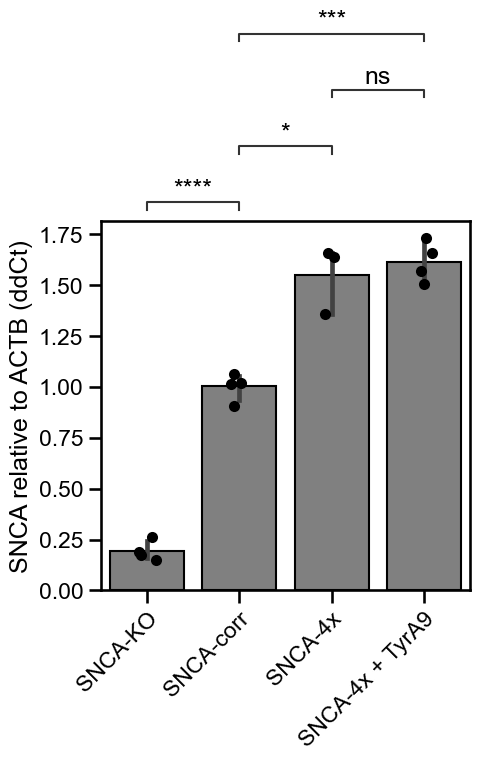

In [ ]:
data = df
x = 'Condition'
y = 'Fold change (ddCt)' 

# Set the seaborn style to "talk" and font to "Arial"
sns.set_context("talk")
rcParams['font.family'] = 'Arial'

# Plot data points
ax = sns.stripplot(data=data, x=x, y=y, s=8, color='black')

# Overlay bar graph
ax = sns.barplot(data=data, x=x, y=y, color='gray', edgecolor="0")

# Rotate x-axis labels and align them with ticks
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# Set plot title and labels
plt.xlabel('')
plt.ylabel('SNCA relative to ACTB (ddCt)')

# Axis scale
ax.set_box_aspect(1)
#ax.set_ylim(0, 1.5)

# Turn labels
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

# Add statistical annotation on top of figure
stat_pairs=[('SNCA-corr', 'SNCA-KO'), 
            ('SNCA-corr', 'SNCA-4x'),
            ('SNCA-corr', 'SNCA-4x + TyrA9'),
            ('SNCA-4x', 'SNCA-4x + TyrA9')
            ]

annot = Annotator(ax, stat_pairs, data=data, x=x, y=y)
annot.configure(test='t-test_welch', verbose=2, loc='outside') # t-test_welch
annot.apply_test()
annot.annotate()

# Save the plot
plt.savefig('qPCR_SNCA' + '.pdf', bbox_inches='tight')
plt.show()
